In [1]:
# Basic Libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

#Evaluation library
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Deep Learning libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow import keras
from tensorflow.keras import layers


In [2]:
#!pip install tensorflow==2.12.0

In [3]:
#!pip install pydot

In [4]:
#Digit MNIST dataset
(X_train_digit, y_train_digit), (X_test_digit, y_test_digit) = mnist.load_data()

In [5]:
 y_test_digit[0]

7

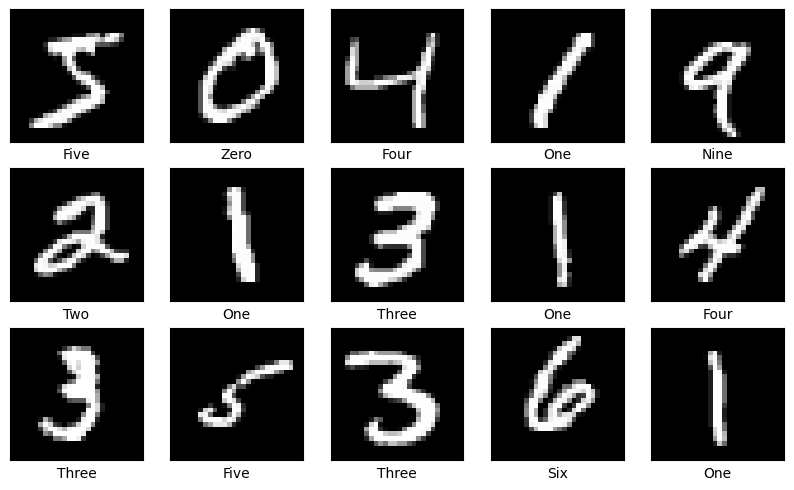

In [6]:
#Names of numbers in the dataset in order
col_names = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

#Visualizing the digits
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train_digit[i], cmap='gray')
    plt.xlabel(col_names[y_train_digit[i]])
plt.show()

In [7]:
X_train_digit.shape

(60000, 28, 28)

# Preprocessing the input-Converting 3d to 2d

In [8]:
X_train_digit = X_train_digit.reshape(60000, 784)
X_test_digit = X_test_digit.reshape(10000, 784)

In [9]:
y_test_digit

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [10]:
#Encoding Digit MNIST Labels
y_train_digit = to_categorical(y_train_digit, num_classes=10)

y_test_digit = to_categorical(y_test_digit, num_classes=10)

In [11]:
y_train_digit

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [12]:
#!pip install scikit-learn==0.24.2

In [13]:
#Creating base neural network
model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(784,)),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(10,activation='sigmoid'),
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 222,218
Trainable params: 222,218
Non-trainable params: 0
_________________________________________________________________


In [15]:
#https://keras.io/api/losses/probabilistic_losses/#sparsecategoricalcrossentropy-class

In [16]:
#Compiling the model
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics = ['accuracy'])

In [17]:
history=model.fit(X_train_digit, y_train_digit, batch_size=100, epochs=10,validation_data=(X_test_digit, y_test_digit))

Epoch 1/10
600/600 [==============================] - 7s 7ms/step - loss: 1.3777 - accuracy: 0.8576 - val_loss: 0.3483 - val_accuracy: 0.9180
Epoch 2/10
600/600 [==============================] - 4s 7ms/step - loss: 0.2468 - accuracy: 0.9363 - val_loss: 0.2481 - val_accuracy: 0.9383
Epoch 3/10
600/600 [==============================] - 4s 7ms/step - loss: 0.1632 - accuracy: 0.9547 - val_loss: 0.2186 - val_accuracy: 0.9466
Epoch 4/10
600/600 [==============================] - 4s 6ms/step - loss: 0.1372 - accuracy: 0.9615 - val_loss: 0.1829 - val_accuracy: 0.9568
Epoch 5/10
600/600 [==============================] - 4s 7ms/step - loss: 0.1154 - accuracy: 0.9669 - val_loss: 0.1758 - val_accuracy: 0.9585
Epoch 6/10
600/600 [==============================] - 4s 7ms/step - loss: 0.0926 - accuracy: 0.9728 - val_loss: 0.1803 - val_accuracy: 0.9607
Epoch 7/10
600/600 [==============================] - 5s 8ms/step - loss: 0.0939 - accuracy: 0.9730 - val_loss: 0.1692 - val_accuracy: 0.9612
Epoch 

In [18]:
test_loss_digit, test_acc_digit = model.evaluate(X_test_digit, y_test_digit)

313/313 [==============================] - 1s 3ms/step - loss: 0.1586 - accuracy: 0.9635


In [19]:
print('Digit MNIST Test accuracy:', round(test_acc_digit,4))

Digit MNIST Test accuracy: 0.9635


In [20]:
#Predicting the labels-DIGIT
y_predict = model.predict(X_test_digit)


313/313 [==============================] - 1s 3ms/step


In [21]:
y_predict[0]

array([3.54540248e-06, 5.97246766e-01, 1.22138849e-02, 9.88222301e-01,
       6.94070477e-03, 9.65039194e-01, 1.11666456e-01, 1.00000000e+00,
       4.26412065e-04, 2.78086085e-02], dtype=float32)

In [22]:
y_predicts=np.argmax(y_predict, axis=1) # Here we get the index of maximum value in the encoded vector
y_test_digit_eval=np.argmax(y_test_digit, axis=1)

In [23]:
y_predicts[0]

7

In [24]:
y_test_digit_eval

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [25]:
y_pre=pd.DataFrame(y_predicts)

In [26]:
y_pre

,0
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


In [27]:
y_test_digit_eval

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [38]:
#Confusion matrix for Digit MNIST
#con_mat=confusion_matrix(y_test_digit_eval,y_predicts)
#plt.style.use('seaborn-deep')
#plt.figure(figsize=(10,10))
#sns.heatmap(con_mat,annot=True,annot_kws={'size': 15},linewidths=0.5,fmt="d",cmap="gray")
#plt.title('True or False predicted digit MNIST\n',fontweight='bold',fontsize=15)
#plt.show()

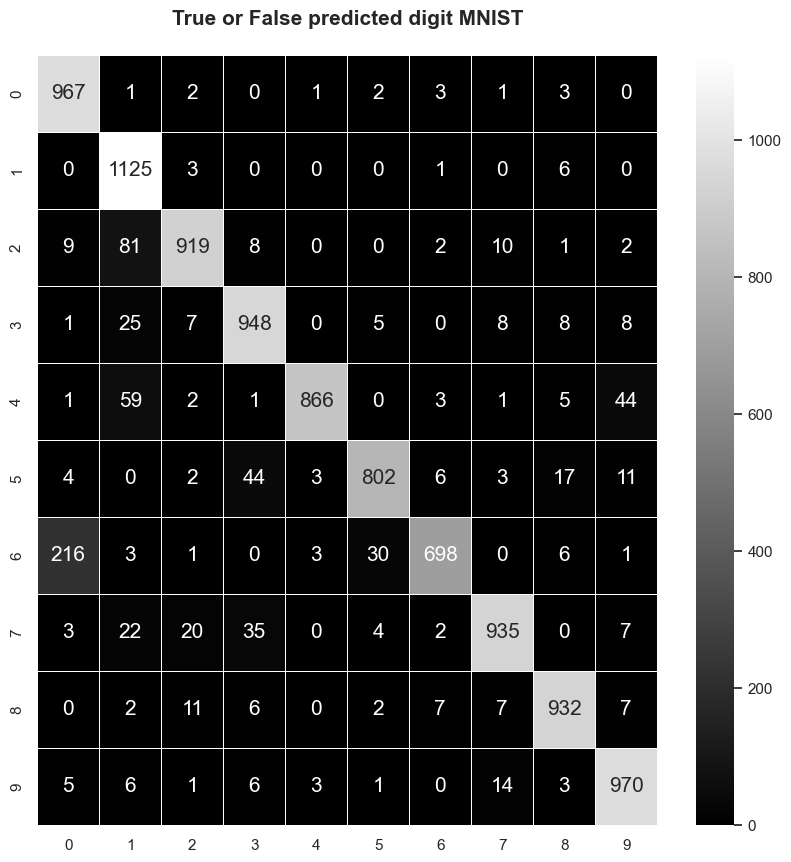

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Optional: Apply seaborn style
sns.set(style="darkgrid")  # or "whitegrid", "ticks", etc.

# Create confusion matrix
con_mat = confusion_matrix(y_test_digit_eval, y_predicts)

plt.figure(figsize=(10,10))
sns.heatmap(con_mat, annot=True, annot_kws={'size': 15}, linewidths=0.5, fmt="d", cmap="gray")
plt.title('True or False predicted digit MNIST\n', fontweight='bold', fontsize=15)
plt.show()


In [30]:
from sklearn.metrics import classification_report

print(classification_report(y_test_digit_eval,y_predicts))

              precision    recall  f1-score   support

           0       0.80      0.99      0.88       980
           1       0.85      0.99      0.92      1135
           2       0.95      0.89      0.92      1032
           3       0.90      0.94      0.92      1010
           4       0.99      0.88      0.93       982
           5       0.95      0.90      0.92       892
           6       0.97      0.73      0.83       958
           7       0.96      0.91      0.93      1028
           8       0.95      0.96      0.95       974
           9       0.92      0.96      0.94      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.91      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [31]:
print(history.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


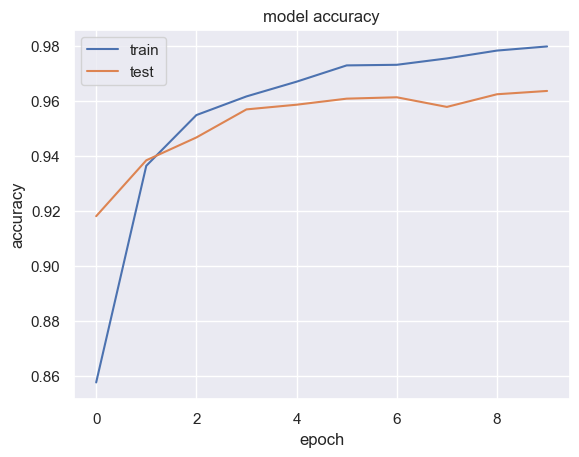

In [32]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()


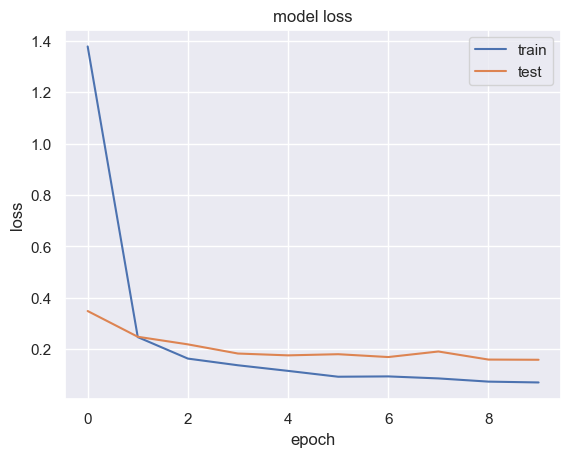

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [34]:
#tf.expand_dims(X_test_digit[0])
y_predict_single = model.predict(X_test_digit[[2]])
y_predicts_single=np.argmax(y_predict_single, axis=1) # Here we get the index of maximum value in the encoded vector
y_test_digit_eval=np.argmax(y_test_digit, axis=1)

1/1 [==============================] - 0s 73ms/step


In [35]:
y_predicts_single[0]

1

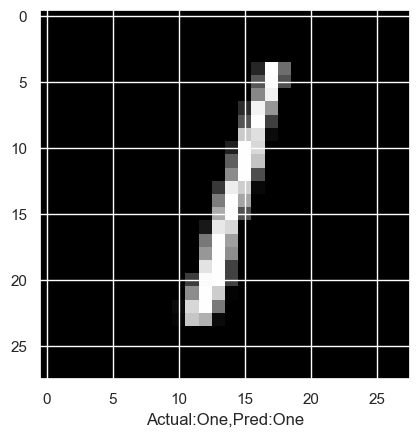

In [36]:
#Names of numbers in the dataset in order
col_names = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

#Visualizing the digits
#plt.figure(figsize=(10,10))
plt.imshow(X_test_digit[2].reshape(28,28), cmap='gray')
plt.xlabel("Actual:{},Pred:{}".format(col_names[np.argmax(y_test_digit[2])],col_names[y_predicts_single[0]]))
plt.show()

In [37]:
y_test_digit[8]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)